# Desafios:

Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

### Leitura da base 1
Dados de investimentos em procedimentos hospitalares(Milhões) separados pro estado

In [784]:
import pandas as pd

In [785]:
dados = pd.read_csv('../Dados/UF_AnoMesAtend_ValorTotal.csv', encoding="ISO-8859-1", skiprows=3, sep=";", 
                    skipfooter=12, thousands=".", decimal=",")
dados.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Tratamento I:
Inserir média para o Acre, 2020/Ago

In [786]:
import numpy as np

In [787]:
tratamento = dados.T[1]
tratamento = tratamento.replace('-', np.nan)
tratamento = tratamento.fillna(0)

In [788]:
valor = round(tratamento.tail(-1).astype('float').mean(), 2)

### Inserindo o valor na base

In [789]:
dados['2020/Ago'] = dados['2020/Ago'].replace('-', valor).astype('float')

In [790]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,3015541.50,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Ordenando a base, por estados com maiores investimentos

In [791]:
dados = dados.sort_values('Total', ascending = False)
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
19,35 São Paulo,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,...,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08,3.892935e+10
16,31 Minas Gerais,-,-,-,-,-,-,-,-,-,...,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07,1.916011e+10
20,41 Paraná,-,-,-,-,-,-,-,-,-,...,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07,1.378696e+10
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07,1.195865e+10
18,33 Rio de Janeiro,-,-,-,-,-,-,-,-,-,...,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07,9.696363e+09


### Selecionando as colunas utilizaveis

In [792]:
col_usaveis = dados.mean().index.tolist()
col_usaveis.insert(0, 'Unidade da Federação')

In [793]:
dados_usaveis = dados[col_usaveis]
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,...,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08,3.892935e+10
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,...,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07,1.916011e+10
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,...,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07,1.378696e+10
22,43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,...,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07,1.195865e+10
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,...,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07,9.696363e+09


### Setando UF com index

In [794]:
dados_usaveis.set_index('Unidade da Federação', inplace = True)

In [795]:
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08,3.892935e+10
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07,1.916011e+10
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07,1.378696e+10
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07,1.195865e+10
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07,9.696363e+09


### Removendo numeros antes das UF's

In [796]:
dados_usaveis.index = dados_usaveis.index.str[3:]

In [797]:
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08,3.892935e+10
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07,1.916011e+10
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07,1.378696e+10
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07,1.195865e+10
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07,9.696363e+09


### Removendo total

In [798]:
dados_usaveis = dados_usaveis.drop('Total', 1)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


### Leitura da base II
Dados contendo a população de cada estado, extraidos do wikipédia

In [799]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
dados_pop = pd.read_html(url, thousands=' ')[0]
dados_pop.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46289333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14930634,"7,1%",Chade (14 037 000)
4,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


Selecionaremos apenas UF e população

In [800]:
dados_selecionados = dados_pop[['Unidade federativa', 'População']]
dados_selecionados.set_index('Unidade federativa', inplace = True)
dados_selecionados.head()

,População
Unidade federativa,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


# Desafio 1
Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

In [801]:
selecao = dados_usaveis['2020/Ago']

In [802]:
tabela_utilizada = dados_selecionados.join(selecao)

In [803]:
tabela_utilizada['Gasto por habitante'] = tabela_utilizada['2020/Ago'] / tabela_utilizada['População']
tabela_utilizada.head()

,População,2020/Ago,Gasto por habitante
Unidade federativa,,,
São Paulo,46289333,1.404149e+08,3.033419
Minas Gerais,21331292,5.747370e+07,2.694337
Rio de Janeiro,17366189,3.626432e+07,2.088214
Bahia,14930634,2.602356e+07,1.742964
Paraná,11516840,4.154240e+07,3.607101


### Plotando gráfico de barras ordenado

In [804]:
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [805]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

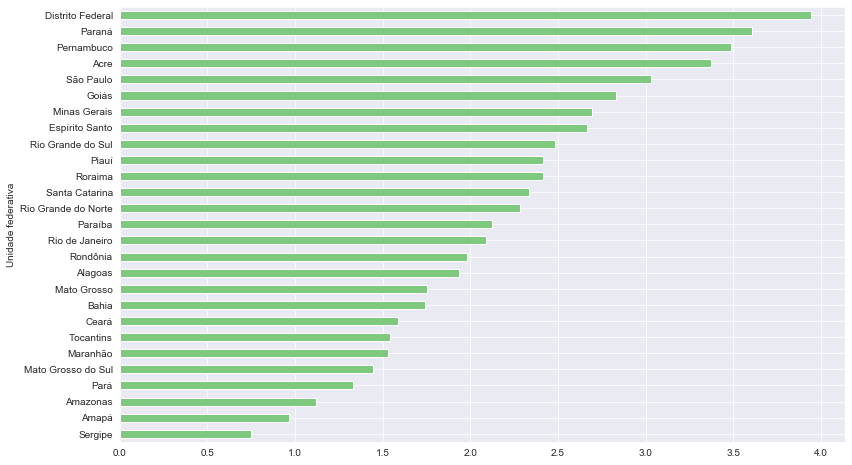

In [806]:
ax, fig = plt.subplots(figsize=(13,8))
ax = tabela_utilizada['Gasto por habitante'].sort_values(ascending = True).plot(kind='barh')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'));

Podemos verificar acima, que na questão de proporção, apesar de São Paulo ser o estado que mais gasta com saúde, está em 5º lugar quando tratamos de verificar a proporção do investimento por habitantes.

# Desafio 2: 
Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

Para resolver este desafio, ao inves de plotar varios gráficos, irei selecionar a média dos valores(Janeiro 2020 ate Julho 2020) e dividi-los pela populacao

In [807]:
selecao = dados_usaveis.T.loc['2020/Jan':'2020/Jul']

In [808]:
selecao = selecao.mean()

In [809]:
dados_selecionados['Media investimentos'] = selecao

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [810]:
dados_selecionados['Media por habitante'] = dados_selecionados['Media investimentos'] / dados_selecionados['População']

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


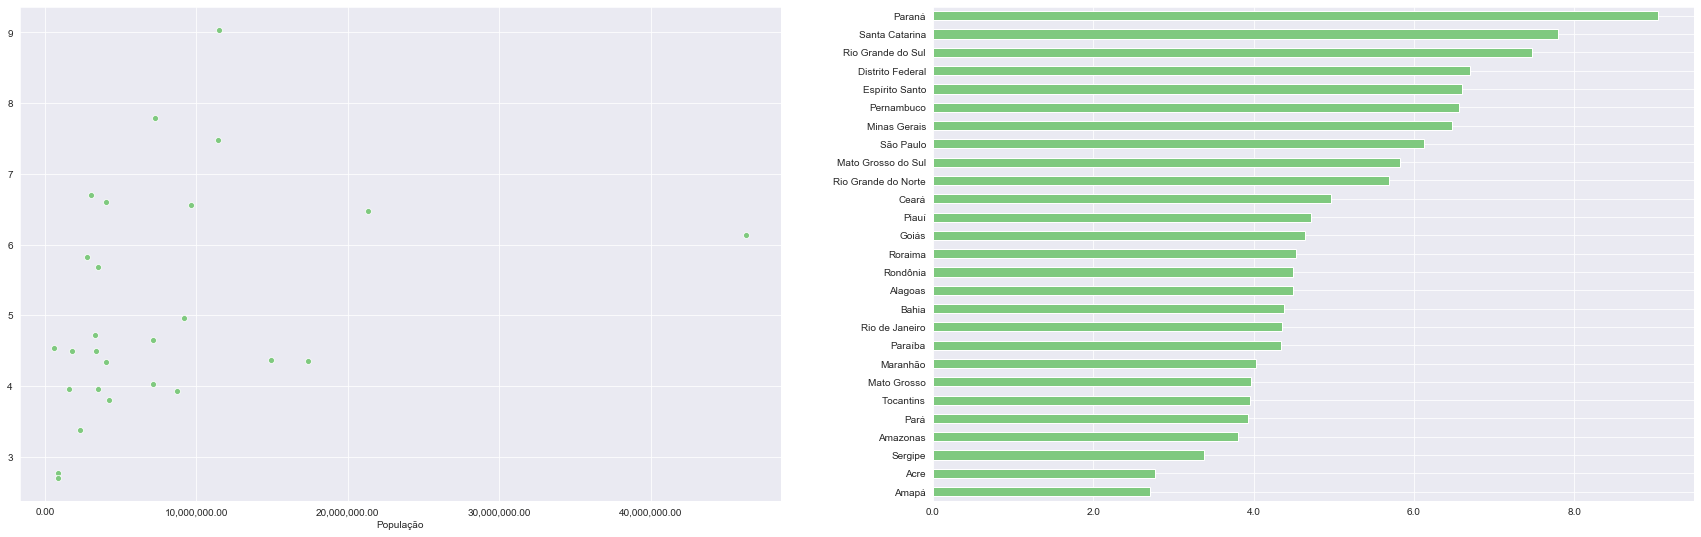

In [811]:
plt.figure(1, figsize=(30,20))

ax = plt.subplot(221)
ax = sns.scatterplot(data = dados_selecionados, x = 'População', y = 'Media por habitante')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_ylabel('')

ax = plt.subplot(222)
ax = dados_selecionados['Media por habitante'].sort_values(ascending = True).plot(kind='barh')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
ax.set_ylabel('');

Resumo do que foi feito para chegar a estes gráficos:<br>
- Selecionados os valores de janeiro de 2020 até julho de 2020;<br>
- Retiramos a média do valor total investido nos meses acima citados;<br>
- Dividimos a média dos valores obtidos pela população;<br>

Podemos verificar, como os dados mostram, que apesar de São Paulo ter o maior investimento em saúde, está em 8º quando tratamos de proporção. Com liderança está o Paraná, com um valor de pouco mais de 9 reais por cidadão, enquanto São Paulo investe um pouco mais de 6 reais por cidadão.

# Desafio 3:
Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

In [812]:
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,...,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,1.404149e+08
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,5.747370e+07
Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,4.154240e+07
Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.097181e+07,8.872087e+07,9.747436e+07,8.545165e+07,8.465140e+07,7.629460e+07,8.607611e+07,8.901948e+07,7.892970e+07,2.834926e+07
Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.505650e+08,4.412259e+07,4.289267e+07,4.529596e+07,4.395135e+07,...,7.462048e+07,7.489586e+07,7.970566e+07,7.241281e+07,7.359450e+07,6.816077e+07,8.628103e+07,7.760493e+07,7.154023e+07,3.626432e+07


In [813]:
selecao = dados_usaveis.iloc[:, -2:]
selecao.head()

,2020/Jul,2020/Ago
Unidade da Federação,,
São Paulo,2.827096e+08,1.404149e+08
Minas Gerais,1.204672e+08,5.747370e+07
Paraná,8.032085e+07,4.154240e+07
Rio Grande do Sul,7.892970e+07,2.834926e+07
Rio de Janeiro,7.154023e+07,3.626432e+07


In [814]:
# Refazer os dados selecionados, pois os modificamos acima
dados_selecionados = dados_pop[['Unidade federativa', 'População']]
dados_selecionados.set_index('Unidade federativa', inplace = True)
dados_selecionados.head()

,População
Unidade federativa,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [815]:
desafio_III = dados_selecionados.join(selecao)
desafio_III.head()

,População,2020/Jul,2020/Ago
Unidade federativa,,,
São Paulo,46289333,2.827096e+08,1.404149e+08
Minas Gerais,21331292,1.204672e+08,5.747370e+07
Rio de Janeiro,17366189,7.154023e+07,3.626432e+07
Bahia,14930634,5.889810e+07,2.602356e+07
Paraná,11516840,8.032085e+07,4.154240e+07


In [816]:
desafio_III['Proporcao Julho'] = desafio_III['2020/Jul'] / desafio_III['População']

In [817]:
desafio_III['Proporcao Agosto'] = desafio_III['2020/Ago'] / desafio_III['População']

In [818]:
desafio_III.head()

,População,2020/Jul,2020/Ago,Proporcao Julho,Proporcao Agosto
Unidade federativa,,,,,
São Paulo,46289333,2.827096e+08,1.404149e+08,6.107445,3.033419
Minas Gerais,21331292,1.204672e+08,5.747370e+07,5.647440,2.694337
Rio de Janeiro,17366189,7.154023e+07,3.626432e+07,4.119512,2.088214
Bahia,14930634,5.889810e+07,2.602356e+07,3.944782,1.742964
Paraná,11516840,8.032085e+07,4.154240e+07,6.974209,3.607101


In [822]:
teste = desafio_III.iloc[:, -2:]
teste.insert(0, 'População', value = desafio_III['População'])
teste.head()

,População,Proporcao Julho,Proporcao Agosto
Unidade federativa,,,
São Paulo,46289333,6.107445,3.033419
Minas Gerais,21331292,5.647440,2.694337
Rio de Janeiro,17366189,4.119512,2.088214
Bahia,14930634,3.944782,1.742964
Paraná,11516840,6.974209,3.607101


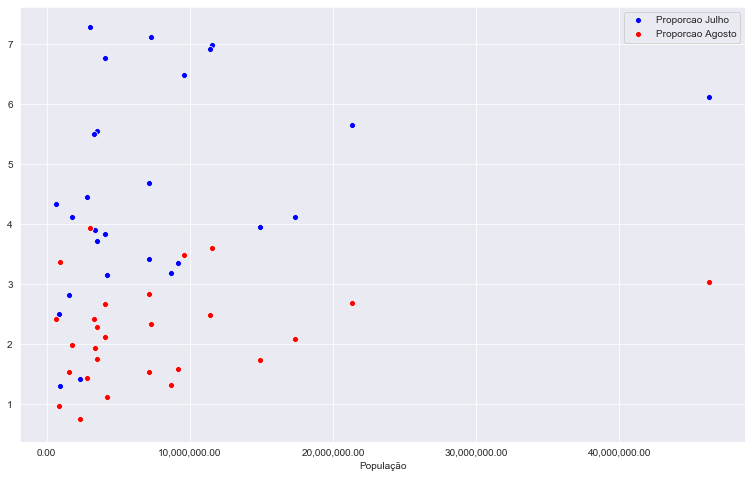

In [844]:
ax, fig = plt.subplots(figsize=(13,8))

ax = sns.scatterplot(data = teste, x = 'População', y = 'Proporcao Julho', color = 'blue', label = 'Proporcao Julho')
ax = sns.scatterplot(data = teste, x = 'População', y = 'Proporcao Agosto', color = 'red', label = 'Proporcao Agosto')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'));

Podemos ver, que de modo geral, em agosto foi o mês que houve menos investimentos por pessoa.<br>
Talvez isso seja por que dados não foram processados ainda, mas julho ganhou em disparada nos valores investidos.